# Exploratory Data Analysis – Customer Churn

## Objective
Identify behavioral, contractual, and financial patterns that influence customer churn.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
eda_df = pd.read_csv('../data/processed/churn_cleaned.csv')

# Convert to category for EDA
cat_cols = ['gender', 'PaymentMethod', 'Contract', 'InternetService']

for col in cat_cols:
    eda_df[col] = eda_df[col].astype('category')

In [3]:
eda_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [4]:
churn_rate = eda_df['Churn'].mean() * 100
churn_rate

np.float64(26.536987079369588)

## Tenure vs Churn

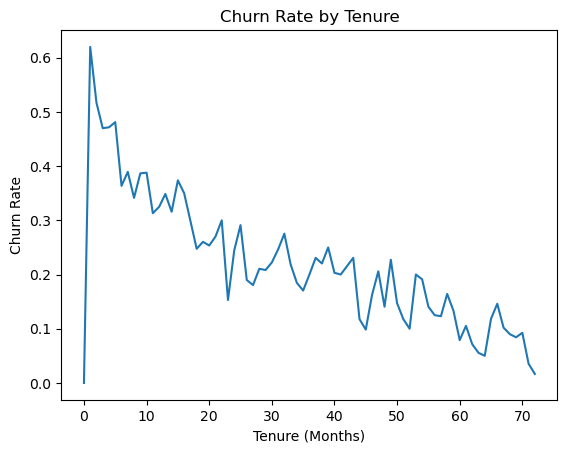

In [5]:
plt.figure()
eda_df.groupby('tenure')['Churn'].mean().plot()
plt.title('Churn Rate by Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Churn Rate')
plt.show()

## Monthy Charges vs Churn

<Figure size 640x480 with 0 Axes>

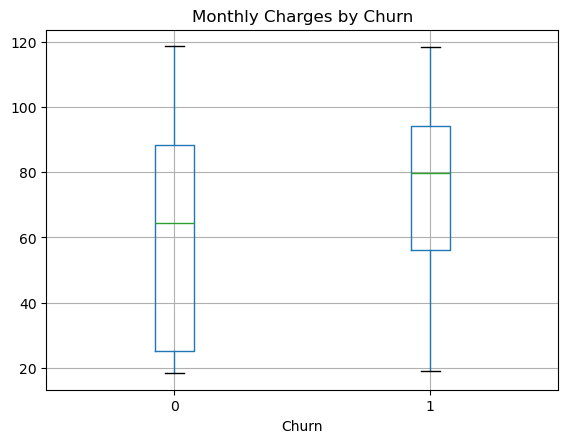

In [6]:
plt.figure()
eda_df.boxplot(column='MonthlyCharges', by='Churn')
plt.title('Monthly Charges by Churn')
plt.suptitle('')
plt.show()

## Contract Type Impact

C:\Users\Hp\AppData\Local\Temp\ipykernel_9296\458980711.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contract_churn = eda_df.groupby('Contract')['Churn'].mean().sort_values()


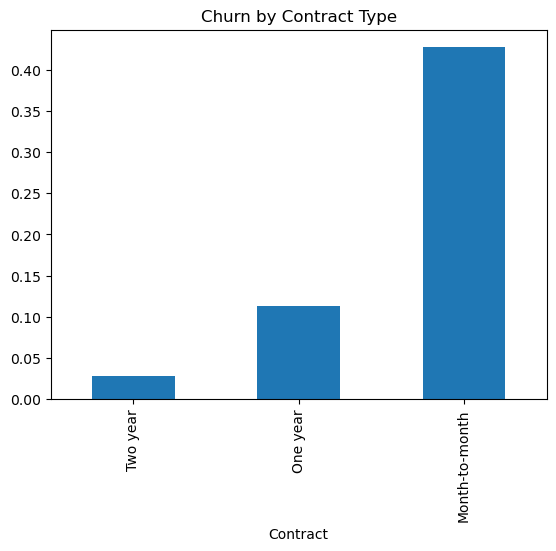

In [7]:
contract_churn = eda_df.groupby('Contract')['Churn'].mean().sort_values()

contract_churn.plot(kind='bar')
plt.title('Churn by Contract Type')
plt.show()

## Payment Method Risk

C:\Users\Hp\AppData\Local\Temp\ipykernel_9296\1544631406.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pay_churn = eda_df.groupby('PaymentMethod')['Churn'].mean().sort_values()


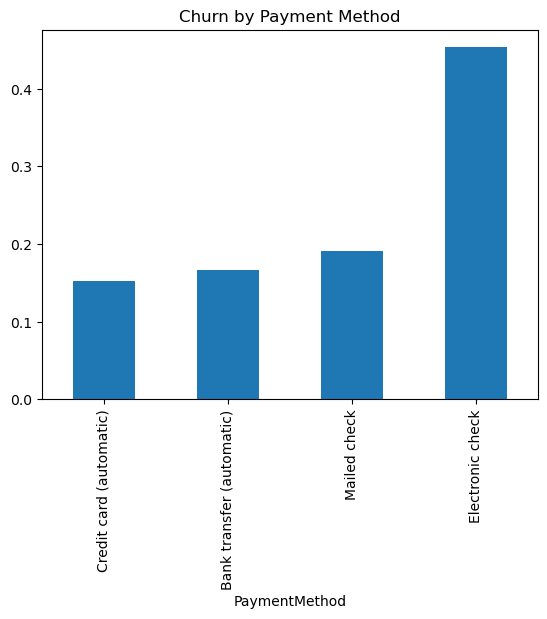

In [8]:
pay_churn = eda_df.groupby('PaymentMethod')['Churn'].mean().sort_values()

pay_churn.plot(kind='bar')
plt.title('Churn by Payment Method')
plt.show()

## Internet Sevice Impact

C:\Users\Hp\AppData\Local\Temp\ipykernel_9296\668743756.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  net_churn = eda_df.groupby('InternetService')['Churn'].mean()


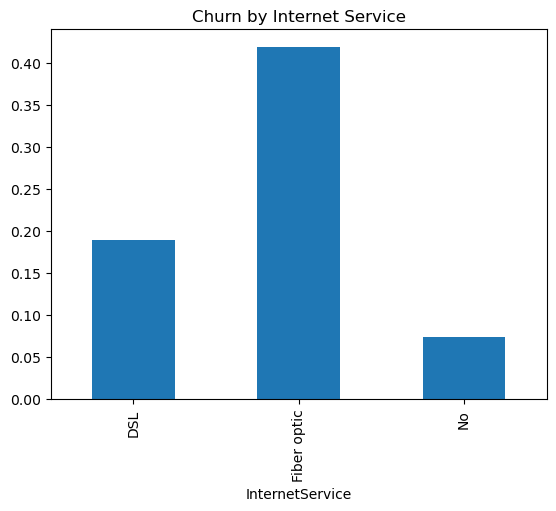

In [9]:
net_churn = eda_df.groupby('InternetService')['Churn'].mean()

net_churn.plot(kind='bar')
plt.title('Churn by Internet Service')
plt.show()

In [10]:
num_df = eda_df.select_dtypes(include=['int64','float64'])

num_df.corr()['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PhoneService        0.011942
Partner            -0.150448
Dependents         -0.164221
TotalCharges       -0.198324
tenure             -0.352229
Name: Churn, dtype: float64

- Tenure is the strongest churn predictor, indicating that early-stage customers are most vulnerable. Monthly charges and billing methods also contribute, suggesting price sensitivity and payment friction.

## Key Insights

- Customers with short tenure have significantly higher churn.
- Month-to-month contracts show the highest churn rates.
- Higher monthly charges correlate with increased churn.
- Electronic check users exhibit higher churn.

In [13]:
eda_df['tenure_group'] = pd.cut(
    eda_df['tenure'],
    bins=[0, 12, 24, 48, 60, 72],
    labels=['0-1yr', '1-2yr', '2-4yr', '4-5yr', '5-6yr']
)

pd.crosstab(eda_df['tenure_group'], eda_df['Churn'], normalize='index') * 100

Churn,0,1
tenure_group,,
0-1yr,52.321839,47.678161
1-2yr,71.289062,28.710938
2-4yr,79.611041,20.388959
4-5yr,85.576923,14.423077
5-6yr,93.390192,6.609808


In [14]:
pd.crosstab(eda_df['Contract'], eda_df['Churn'], normalize='index') * 100

Churn,0,1
Contract,,
Month-to-month,57.290323,42.709677
One year,88.730482,11.269518
Two year,97.168142,2.831858


- Customers in their first year on month-to-month contracts exhibit the highest churn rates, indicating weak early engagement and low contractual commitment.

### Few strategies to improve this churn rate:
- Push 1-year plans early
- Give first-year discounts
- Improve onboarding
- Retention campaigns at Month 3–6

In [15]:
eda_df['charge_group'] = pd.cut(
    eda_df['MonthlyCharges'],
    bins=5
)

pd.crosstab(eda_df['charge_group'], eda_df['Churn'], normalize='index') * 100


Churn,0,1
charge_group,,
"(18.15, 38.35]",88.592098,11.407902
"(38.35, 58.45]",73.034826,26.965174
"(58.45, 78.55]",70.519386,29.480614
"(78.55, 98.65]",63.033954,36.966046
"(98.65, 118.75]",69.942748,30.057252


In [16]:
pd.crosstab(
    [eda_df['Contract'], eda_df['tenure_group']],
    eda_df['Churn'],
    normalize='index'
) * 100


Churn                                 0          1
Contract       tenure_group                       
Month-to-month 0-1yr          48.645938  51.354062
               1-2yr          62.279512  37.720488
               2-4yr          67.082294  32.917706
               4-5yr          72.222222  27.777778
               5-6yr          77.777778  22.222222
One year       0-1yr          89.430894  10.569106
               1-2yr          91.878173   8.121827
               2-4yr          89.382239  10.617761
               4-5yr          86.292835  13.707165
               5-6yr          87.859425  12.140575
Two year       0-1yr         100.000000   0.000000
               1-2yr         100.000000   0.000000
               2-4yr          97.810219   2.189781
               4-5yr          96.028881   3.971119
               5-6yr          96.855984   3.144016

In [17]:
pd.crosstab(
    [eda_df['Contract'], eda_df['tenure_group'], eda_df['PaymentMethod']],
    eda_df['Churn'],
    normalize='index'
).sort_values(1, ascending=False).head(10) * 100


Churn                                                          0          1
Contract       tenure_group PaymentMethod                                  
Month-to-month 0-1yr        Electronic check           36.897275  63.102725
               1-2yr        Electronic check           48.732394  51.267606
               0-1yr        Bank transfer (automatic)  51.442308  48.557692
                            Credit card (automatic)    58.638743  41.361257
               2-4yr        Electronic check           59.042553  40.957447
               0-1yr        Mailed check               62.246490  37.753510
               4-5yr        Electronic check           62.931034  37.068966
               1-2yr        Credit card (automatic)    68.595041  31.404959
               2-4yr        Bank transfer (automatic)  69.767442  30.232558
                            Credit card (automatic)    72.327044  27.672956

- The highest churn risk is observed among first-year, month-to-month customers using electronic check payments, particularly in mid-to-high pricing tiers. This segment exhibits over 60% churn and represents the primary retention vulnerability.